### PODPUNKT A

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
import pandas as pd
import numpy as np


(x_mnist, y_mnist), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

n_features = x_mnist.shape[1] * x_mnist.shape[2]
n_samples = 2 * n_features


x_sub, y_sub = resample(x_mnist, y_mnist, n_samples=n_samples, replace=False, random_state=0)
x_sub = x_sub.reshape(-1, n_features)


In [3]:
n_best_features = 1*n_features//2
N = 28
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=ExtraTreesClassifier(), n_features_to_select=n_best_features, step=50, verbose=5)
rfe_selector.fit(x_sub, y_sub)
rfe_support = rfe_selector.get_support()
rfe_support = rfe_support.reshape(N,N)


Fitting estimator with 784 features.
Fitting estimator with 734 features.
Fitting estimator with 684 features.


C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 634 features.
Fitting estimator with 584 features.
Fitting estimator with 534 features.
Fitting estimator with 484 features.


C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 434 features.


C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


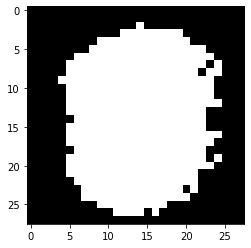

In [4]:
import matplotlib.pyplot as plt
plt.imshow(rfe_support,cmap='gray')

### PODPUNKT B

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_sub, y_sub, test_size=0.4, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
all_score = accuracy_score(y_true = y_test, y_pred = y_pred)
all_score

0.8789808917197452

In [7]:
x_train.shape

(940, 784)

In [8]:
x_train_better = x_train[:,rfe_support.reshape(-1)]
x_test_better = x_test[:,rfe_support.reshape(-1)]

model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(x_train_better, y_train)

y_pred = model.predict(x_test_better)
better_score = accuracy_score(y_true = y_test, y_pred = y_pred)
better_score

0.8837579617834395

### PODPUNKT C

In [9]:
indexes = [(x, y) for x in range(0, 28) for y in range(0, 28)]
df = pd.DataFrame(x_train,columns=indexes)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df) # scaling data
pca = PCA(n_components=x_train.shape[1])  # instantiate a PCA object
pca.fit(scaled_data)  # find the principal components
x_pca = pca.transform(scaled_data)
print("before PCA: {} vs after PCA: {}".format(scaled_data.shape, x_pca.shape))

before PCA: (940, 784) vs after PCA: (940, 784)


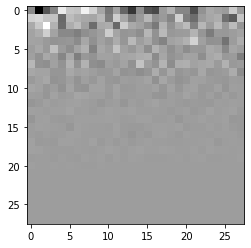

In [11]:
plt.imshow(x_pca[1].reshape(28,28),cmap='gray')

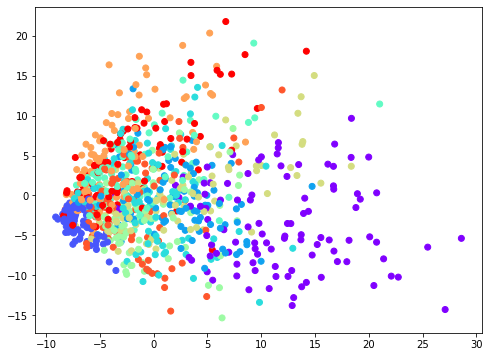

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='rainbow')

In [13]:
for i in range(0, 1):
    scaler = preprocessing.Normalizer().fit(x_train)
    loc_x_best_train_scaled = scaler.transform(x_train)
    loc_x_best_test_scaled = scaler.transform(x_test)
    
    pca.fit(loc_x_best_train_scaled)
    pca_x_train_best = pca.transform(loc_x_best_train_scaled)
    pca_x_test_best = pca.transform(loc_x_best_test_scaled)
    for k_neigh in [1, 3, 5]:
        neigh = KNeighborsClassifier(n_neighbors=k_neigh, algorithm='auto').fit(pca_x_train_best, y_train)
        y_pred = neigh.predict(pca_x_test_best)
        score = accuracy_score(y_true = y_test, y_pred = y_pred)
        print('%d;%f' % (k_neigh, score))

1;0.888535
3;0.904459
5;0.899682


### PODPUNKT D

In [34]:
model_pca = ExtraTreesClassifier()
model_pca.fit(pca_x_train, y_train)

# selekcja najistotniejszych cech

feat_importances_mnist = pd.Series(model_pca.feature_importances_)

# zapisanie listy najgorszych cech

worst_mnist_features = feat_importances_mnist.nsmallest(500).index.values

pca_x_train_sub = np.delete(pca_x_train, worst_mnist_features, 1)
pca_x_test_sub = np.delete(pca_x_test, worst_mnist_features, 1)
model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(pca_x_train_sub, y_train)

y_pred = model.predict(pca_x_test_sub)
score = accuracy_score(y_true = y_test, y_pred = y_pred)
score

C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9028662420382165

### PODPUNKT E

In [58]:
# zapisanie listy najlepszych cech
best_mnist_features = feat_importances_mnist.nlargest(15).index.values

pca_x_train_sub = np.take(pca_x_train, best_mnist_features, 1)
pca_x_test_sub = np.take(pca_x_test, best_mnist_features, 1)
model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(pca_x_train_sub, y_train)

y_pred = model.predict(pca_x_test_sub)
score = accuracy_score(y_true = y_test, y_pred = y_pred)
score

0.8757961783439491

### PODPUNKT G

In [71]:
import imgaug as ia
import imgaug.augmenters as iaa

def augment(images):
    seq = iaa.Sequential(
        [
            iaa.Crop(px=(1, 10), keep_size=True),
            iaa.Sometimes(0.5, iaa.Affine(
                rotate=(-20, 20),
                mode=ia.ALL
            )),
            iaa.SomeOf((1, 2),
                [
                    iaa.GaussianBlur((0, 0.5)),
                    iaa.SaltAndPepper(0.07),
                ],
                random_order=True
            )
        ]
    )
    imagesX = images[:, :, :, np.newaxis]
    images_aug = seq(images=imagesX)
    return [np.squeeze(img) for img in images_aug]

from sklearn.utils import shuffle
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_train_a = augment(x_train)
y_train_a = y_train

x_train_aug = np.concatenate([x_train, x_train_a])
y_train_aug = np.concatenate([y_train, y_train_a])

x_train_aug, y_train_aug = shuffle(x_train_aug, y_train_aug)
x_train_aug = x_train_aug.reshape((x_train_aug.shape[0], -1))

In [77]:
pca = PCA(n_components=784)
pca.fit(x_train_aug)
pca_x_train_aug = pca.transform(x_train_aug)
pca_x_test = pca.transform(x_test)

neigh_pca = KNeighborsClassifier(n_neighbors=5, algorithm='auto').fit(pca_x_train_aug, y_train_aug)
y_pred_pca = neigh_pca.predict(pca_x_test)

pca_score = accuracy_score(y_true = y_test, y_pred = y_pred_pca)
pca_score

0.8996815286624203

In [76]:
model_pca = ExtraTreesClassifier()
model_pca.fit(pca_x_train_aug, y_train_aug)

# selekcja najistotniejszych cech
feat_importances_mnist = pd.Series(model_pca.feature_importances_)

# zapisanie listy najlepszych cech
best_mnist_features = feat_importances_mnist.nlargest(15).index.values

pca_x_train_aug_sub = np.take(pca_x_train_aug, best_mnist_features, 1)
pca_x_test_sub = np.take(pca_x_test, best_mnist_features, 1)
model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(pca_x_train_aug_sub, y_train_aug)

y_pred = model.predict(pca_x_test_sub)
pca_m_score = accuracy_score(y_true = y_test, y_pred = y_pred)
pca_m_score

C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7754777070063694

In [78]:
### Bez PCA
model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(x_train_aug, y_train_aug)

y_pred = model.predict(x_test)
no_pca_score = accuracy_score(y_true = y_test, y_pred = y_pred)
no_pca_score

0.8996815286624203

In [79]:
model_aug = ExtraTreesClassifier()
model_aug.fit(x_train_aug, y_train_aug)

# selekcja najistotniejszych cech

feat_importances_mnist = pd.Series(model_aug.feature_importances_)

# zapisanie listy najlepszych cech

best_mnist_features = feat_importances_mnist.nlargest(15).index.values

x_train_aug_sub = np.take(x_train_aug, best_mnist_features, 1)
x_test_sub = np.take(x_test, best_mnist_features, 1)
model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(x_train_aug_sub, y_train_aug)

y_pred = model.predict(x_test_sub)
m_score = accuracy_score(y_true = y_test, y_pred = y_pred)
m_score

C:\Users\magk9\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6353503184713376

In [81]:
print(f"PCA: {pca_score} vs no PCA: {no_pca_score}")

PCA: 0.8996815286624203 vs no PCA: 0.8996815286624203


In [82]:
print(f"PCA: {pca_m_score} vs no PCA: {m_score}")

PCA: 0.7754777070063694 vs no PCA: 0.6353503184713376
